# *Evaluation Metrics and Regression Implementation*

---

# Theoretical

---



# Q1. What does R-squared represent in a regression model?

# Understanding R-Squared in a Regression Model

## What is R-Squared?
- R-squared (R²) is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model.
- It indicates the goodness of fit, helping to assess how well the model explains the data.

## Key Characteristics of R-Squared
- **Value Range:** R² ranges from **0** to **1**.
  - **R² = 0**: The model explains none of the variability in the target variable.
  - **R² = 1**: The model explains all of the variability in the target variable.
- Higher R² values generally indicate a better fit, but this is not always ideal if the model is overfitting.

## Formula for R-Squared
\[
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
\]

Where:
- **\(SS_{res}\)** = Sum of Squares of Residuals (Unexplained variance)
- **\(SS_{tot}\)** = Total Sum of Squares (Total variance)

## Interpreting R-Squared
- **R² close to 1:** Indicates a strong correlation between independent and dependent variables.
- **R² close to 0:** Suggests the model does not explain much of the variability in the data.
- **Negative R²:** Possible in models without an intercept, indicating the model fits worse than a horizontal line.

## Example
```python
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

# Model creation
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)

print(f"R-squared value: {r2:.2f}")


# Q2. What are the assumptions of linear regression?

# Assumptions of Linear Regression

Linear regression relies on several key assumptions to ensure accurate and reliable results. Violating these assumptions can lead to biased or misleading outcomes.

## 1. **Linearity**
- The relationship between the independent variables (X) and the dependent variable (Y) must be linear.
- This can be checked using scatter plots or residual plots.

## 2. **Independence (No Autocorrelation)**
- Observations should be independent of each other.
- In time-series data, autocorrelation may violate this assumption, which can be checked using the **Durbin-Watson test**.

## 3. **Homoscedasticity**
- The variance of errors (residuals) should be constant across all levels of the independent variable(s).
- Heteroscedasticity can be identified through residual plots and corrected using log transformations or weighted regression.

## 4. **Normality of Residuals**
- The residuals should follow a normal distribution.
- This can be checked using:
  - **Q-Q plots**
  - **Histogram of residuals**
  - **Shapiro-Wilk test**, **Kolmogorov-Smirnov test**, etc.

## 5. **No Multicollinearity**
- Independent variables should not be highly correlated with each other.
- Multicollinearity can be detected using:
  - **Variance Inflation Factor (VIF)** (Values above 10 indicate severe multicollinearity).
  - **Correlation matrix**.

## 6. **No Endogeneity**
- Independent variables should not be correlated with the error terms.
- Endogeneity can lead to biased estimates, often addressed using **instrumental variables**.

## 7. **Correct Model Specification**
- The model should include all relevant variables and avoid unnecessary complexity.
- Mis-specification may result in omitted variable bias or overfitting.

### Conclusion
- Ensuring these assumptions are met is crucial for deriving valid insights from a linear regression model.
- Diagnostic tests and visualizations are essential to identify and address any violations.


# Q3. What is the difference between R-squared and Adjusted R-squared?

# Difference Between R-Squared and Adjusted R-Squared

## 1. **R-Squared (R²)**
- **Definition:** R² measures the proportion of variance in the dependent variable explained by the independent variables.
- **Value Range:** R² lies between **0** and **1**.
- **Limitation:** Adding more independent variables **always increases** R², even if the new variables have no real predictive power. This can lead to overfitting.

### Formula for R²
\[
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
\]

---

## 2. **Adjusted R-Squared**
- **Definition:** Adjusted R² modifies R² by accounting for the number of predictors in the model. It penalizes excessive predictors, making it a more reliable indicator of model performance.
- **Value Range:** Adjusted R² is **always less than or equal to R²**.
- **Advantage:** Unlike R², adjusted R² **increases only if the new variable improves the model's explanatory power**.

### Formula for Adjusted R²
\[
\text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2) \times (n - 1)}{n - k - 1} \right)
\]

Where:
- **\(n\)** = Number of observations  
- **\(k\)** = Number of independent variables  
- **\(R^2\)** = R-squared value  

---

## 3. **Key Differences**

| Aspect               | R-Squared (R²) | Adjusted R-Squared |
|----------------------|-----------------|---------------------|
| **Purpose**            | Measures how well the model fits the data. | Adjusts R² to account for the number of predictors. |
| **Effect of Adding Variables** | Always increases or stays the same. | Increases only if the new variable improves the model. |
| **Risk of Overfitting**  | Higher risk as irrelevant variables can inflate R². | Lower risk due to penalty for unnecessary predictors. |
| **Best Use Case**        | Useful for basic model evaluation. | Preferred when comparing models with different numbers of predictors. |

---

## 4. **Example**
```python
import numpy as np
import statsmodels.api as sm

# Sample data
X = np.random.rand(100, 3)  # 3 predictors
y = 3*X[:, 0] + 2*X[:, 1] + np.random.rand(100)  # Target with some noise

# Add constant for intercept
X = sm.add_constant(X)

# Model creation
model = sm.OLS(y, X).fit()

# R-squared and Adjusted R-squared
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")


# Q4. Why do we use Mean Squared Error (MSE):

## What is Mean Squared Error (MSE)?
- **MSE** is a common loss function used in regression models to measure the average squared difference between the actual and predicted values.
- It is calculated as:

\[
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\]

Where:
- **\(y_i\)** = Actual value  
- **\(\hat{y}_i\)** = Predicted value  
- **n** = Number of observations  

---

## Why Do We Use MSE?

### 1. **Penalizes Large Errors Heavily**
- MSE squares the differences between actual and predicted values, giving **greater weight** to large errors.
- This property makes it highly sensitive to significant deviations, ensuring the model minimizes substantial prediction mistakes.

### 2. **Differentiable Function**
- The squared term makes MSE smooth and differentiable, which is crucial for gradient-based optimization algorithms like **Gradient Descent** to efficiently minimize the error.

### 3. **Mathematical Simplicity**
- MSE has a simple mathematical structure that aligns well with statistical and machine learning models.

### 4. **Focus on Variance**
- Since MSE computes the average of squared differences, it inherently measures the variance of prediction errors, providing a clear indicator of model performance.

### 5. **Widely Used in Regression**
- MSE is the standard evaluation metric for regression models, making it easier to compare models and interpret results.

---

## Limitations of MSE
- **Sensitive to Outliers:** Large errors are squared, which can disproportionately impact MSE.
- **Doesn’t Indicate Error Direction:** MSE only considers magnitude, not whether predictions are over or under the actual values.

---

## When to Use MSE
- Ideal when **large errors need to be penalized** more heavily.
- Commonly used in **linear regression**, **neural networks**, and **forecasting models**.

---

### Conclusion
- MSE is a powerful and effective metric for assessing model performance, particularly when minimizing large prediction errors is a priority. However, in the presence of outliers, alternative metrics like **Mean Absolute Error (MAE)** or **Huber Loss** may offer better robustness.


# Q5. What does an Adjusted R-squared value of 0.85 indicate?

# Interpretation of Adjusted R-Squared Value of 0.85

## What is Adjusted R-Squared?
- **Adjusted R-squared** is a modified version of **R-squared** that adjusts for the number of predictors in the model.
- Unlike R², it **penalizes the addition of irrelevant variables**, making it a better measure of model performance for multiple regression.

\[
\text{Adjusted } R^2 = 1 - \left(\frac{(1 - R^2) \times (n - 1)}{n - k - 1} \right)
\]

Where:
- **R²** = Original R-squared value  
- **n** = Number of data points  
- **k** = Number of independent variables  

---

## What Does an Adjusted R-Squared of 0.85 Mean?
An **Adjusted R² = 0.85** indicates that:

- **85% of the variation** in the dependent variable is explained by the independent variables in the model.
- The remaining **15% of the variation** is unexplained, likely due to factors not included in the model.
- Since Adjusted R² penalizes unnecessary variables, this high value suggests that the model is likely well-fitted without excessive complexity.

---

## Key Insights
- **High Adjusted R² (close to 1):** Strong model fit with significant explanatory power.
- **Moderate Adjusted R² (0.5 - 0.7):** Acceptable fit but may require improvements.
- **Low Adjusted R² (close to 0):** Poor model fit, indicating weak predictive power.

---

## Example Scenario
Suppose you're building a regression model to predict **house prices** based on features like:
- Square footage
- Number of bedrooms
- Age of the property
- Location index

An Adjusted R² of **0.85** suggests that these factors collectively explain **85%** of the variability in house prices, making it a strong predictive model.

---

### Conclusion
An **Adjusted R² of 0.85** reflects a well-fitted model with high explanatory power. However, it’s essential to combine this insight with **residual analysis** and **domain knowledge** to confirm model reliability.


# Q6. How do we check for normality of residuals in linear regression?

## Why Check for Normality?
- Ensures valid statistical inferences.  
- Essential for accurate hypothesis testing and p-value interpretation.  
- Violations can lead to biased regression results.  

---

## Methods to Check for Normality

### 1. Histogram of Residuals
- Visualizes the distribution of residuals.  
- A **bell-shaped curve** suggests normality.  
- Easy to interpret but may miss subtle deviations.  

**Code Example:**
```python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

# Fit regression model
model = LinearRegression().fit(X, y)
residuals = y - model.predict(X)

# Histogram plot
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()



## 2. Q-Q (Quantile-Quantile) Plot
- Plots residual quantiles against expected quantiles of a normal distribution.  
- Points should align closely along the **diagonal line** for normality.  
- Ideal for detecting deviations in the data's tails.  

**Code Example:**  
```python
import scipy.stats as stats
import matplotlib.pyplot as plt  

# Q-Q Plot
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


## 3. Shapiro-Wilk Test  
- Formal test for normality.  
- **p-value > 0.05** → Residuals are likely normal.  
- **p-value < 0.05** → Residuals deviate significantly from normality.  

**Code Example:**  
```python
from scipy.stats import shapiro    
stat, p_value = shapiro(residuals)  
print(f"Shapiro-Wilk Test: p-value = {p_value:.3f}")  


## 4. Kolmogorov-Smirnov Test  
- Compares residual distribution with a normal distribution.  
- **p-value > 0.05** → Residuals are likely normal.  
- **p-value < 0.05** → Residuals deviate from normality.  

**Code Example:**  
```python
from scipy.stats import kstest    

stat, p_value = kstest(residuals, 'norm')   
print(f"Kolmogorov-Smirnov Test: p-value = {p_value:.3f}")  



## 5. Anderson-Darling Test  
- Tests if residuals follow a normal distribution.  
- Provides critical values for various significance levels.  
- Highly sensitive to deviations in the tails.  

**Code Example:**  
```python
from scipy.stats import anderson    

result = anderson(residuals, dist='norm')   
print("Anderson-Darling Test Results:")   
print(f"Statistic: {result.statistic}")   
print(f"Critical Values: {result.critical_values}")   


# Q7. What is multicollinearity, and how does it impact regression?

# Multicollinearity in Regression  

## What is Multicollinearity?  
- Multicollinearity occurs when two or more independent variables in a regression model are **highly correlated** with each other.  
- This correlation makes it difficult to isolate the effect of each independent variable on the dependent variable.  

---

## Types of Multicollinearity  
- **Perfect Multicollinearity:** When one independent variable is an exact linear combination of another.  
- **Imperfect Multicollinearity:** When two or more independent variables are highly, but not perfectly, correlated.  

---

## Impact of Multicollinearity on Regression  
- **Unstable Coefficients:** Regression coefficients may change drastically with minor data changes.  
- **Inflated Standard Errors:** Larger standard errors reduce the precision of coefficient estimates.  
- **Misleading p-values:** Important variables may appear insignificant despite having a true impact.  
- **Reduced Model Interpretability:** It becomes difficult to identify which variable is truly influencing the outcome.  

---

## Detecting Multicollinearity  
- **Variance Inflation Factor (VIF):**  
  - VIF > 10 → High multicollinearity  
  - VIF between 5-10 → Moderate multicollinearity  
  - VIF < 5 → Low multicollinearity  
- **Correlation Matrix:** Identifies highly correlated predictor variables.  
- **Condition Number:** Large condition numbers (above 30) suggest multicollinearity.  

---

## Example Code: Detecting Multicollinearity Using VIF  
```python
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant

# Sample Data
data = pd.DataFrame({
    'X1': [1, 2, 3, 4, 5],
    'X2': [2, 4, 6, 8, 10],  # Perfectly correlated with X1
    'X3': [5, 3, 6, 2, 8]   # Random variable
})

# Adding constant for VIF calculation
X = add_constant(data)

# Calculating VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


# Q8. What is Mean Absolute Error (MAE)?

# Mean Absolute Error (MAE)  

## What is MAE?  
- **Mean Absolute Error (MAE)** is a metric used to measure the average magnitude of errors in a regression model.  
- It calculates the average absolute difference between the predicted values and the actual values.  
- MAE gives an intuitive sense of model accuracy by expressing errors in the same unit as the target variable.  

---

## MAE Formula  
\[
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\]  
Where:  
- \(n\) = Total number of observations  
- \(y_i\) = Actual value  
- \(\hat{y}_i\) = Predicted value  

---

## Key Characteristics of MAE  
- **Range:** MAE is always positive. A lower MAE indicates better model performance.  
- **Scale-Dependent:** MAE is sensitive to the scale of data (values with larger magnitudes may lead to larger MAE).  
- **No Squaring of Errors:** Unlike Mean Squared Error (MSE), MAE does not amplify large errors, making it **robust to outliers**.  

---

## Example Code: Calculating MAE in Python  
```python
from sklearn.metrics import mean_absolute_error

# Actual vs Predicted values
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


# Q9. What are the benefits of using an ML pipeline?

# Benefits of Using an ML Pipeline  

## What is an ML Pipeline?  
- An **ML pipeline** is a structured sequence of data preprocessing, feature engineering, model training, and evaluation steps that are automated and connected in a workflow.  
- It helps streamline the entire machine learning process, from raw data to model deployment.  

---

## Key Benefits of Using an ML Pipeline  

### 1. **Automation and Efficiency**  
- Automates repetitive tasks like data cleaning, feature scaling, and model evaluation.  
- Reduces manual intervention, allowing data scientists to focus on model improvement.  

### 2. **Reproducibility**  
- Ensures consistent results by following the same steps for each experiment.  
- Facilitates collaboration across teams by standardizing processes.  

### 3. **Improved Model Performance**  
- Enables systematic tuning of hyperparameters, feature selection, and cross-validation.  
- Helps identify the best-performing model efficiently.  

### 4. **Modularity and Flexibility**  
- Each step in the pipeline (e.g., data cleaning, model training) is modular.  
- Individual components can be modified or improved without rebuilding the entire pipeline.  

### 5. **Scalability**  
- Pipelines allow easy scaling to handle large datasets using distributed computing frameworks like **Spark** or **Dask**.  

### 6. **Error Tracking and Debugging**  
- Pipelines make it easier to isolate errors in specific steps, improving debugging efficiency.  

### 7. **Deployment Ready**  
- Pipelines streamline the transition from model development to deployment, ensuring minimal code changes for production.  

---

## Example Code: Creating a Simple ML Pipeline in Python  
```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Load data
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.2, random_state=42
)

# Define the ML pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),   # Handles missing values
    ('scaler', StandardScaler()),                 # Scales data
    ('model', LinearRegression())                 # Trains the model
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the model
score = pipeline.score(X_test, y_test)
print(f'Model R-squared Score: {score:.2f}')


# Q10. Why is RMSE considered more interpretable than MSE?

## 1. **Definition of RMSE and MSE**
- **Mean Squared Error (MSE):** Measures the average squared difference between actual and predicted values.  
- **Root Mean Squared Error (RMSE):** The square root of MSE, which returns the error in the same unit as the target variable.  

### Formulas  
- **MSE Formula:**  
\[
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\]  

- **RMSE Formula:**  
\[
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
\]  

---

## 2. **Key Reason for RMSE's Better Interpretability**
- **Same Unit as Target Variable:**  
  - RMSE has the **same unit** as the target variable, making it easier to understand and relate to the actual data.  
  - For example, if the target variable represents **house prices in ₹**, RMSE will also be in ₹, while MSE will be in ₹² (which lacks direct interpretability).  

---

## 3. **Sensitivity to Large Errors**
- Both RMSE and MSE give **higher weight** to large errors, but RMSE's output is easier to interpret since the error is measured in the original data scale.  

---

## 4. **Practical Example:**
Suppose the actual house prices are in **lakhs** and RMSE = **1.5**. This means the model’s average prediction error is **₹1.5 lakh**, which is intuitive.  

On the other hand, if MSE = **2.25**, interpreting this value directly is less meaningful without taking the square root.  

---

## 5. **Summary:**
| Aspect            | **MSE**            | **RMSE**             |
|:------------------|:-------------------|:---------------------|
| **Unit**            | Square of original unit (e.g., ₹²) | Same as the original unit (e.g., ₹) |
| **Interpretability** | Less intuitive due to squared errors | More intuitive as it represents actual prediction error |
| **Emphasis on Outliers** | Stronger emphasis on large errors | Similar but easier to interpret |

---

## Conclusion
✅ **RMSE** is preferred for interpretability because it provides a direct measure of average prediction error in the **same unit** as the target variable, making it easier to communicate model performance to stakeholders.  


# **Q11. What is pickling in Python, and how is it useful in ML?**

# Pickling in Python and Its Importance in ML  

## 1. **What is Pickling?**  
- **Pickling** is the process of **serializing** (converting) Python objects into a byte stream to save them to a file.  
- This serialized data can later be **unpickled** (deserialized) to retrieve the original object.  

---

## 2. **Why is Pickling Useful in ML?**  
Pickling is particularly useful in machine learning for the following reasons:  

### ✅ **Model Persistence**  
- Trained ML models can be serialized using pickle and reloaded later without retraining.  
- Useful when deploying models in production environments.  

### ✅ **Faster Experimentation**  
- Intermediate results like feature engineering steps, preprocessed data, or fitted encoders can be stored and reused.  

### ✅ **Data Sharing**  
- Pickled objects can be easily transferred between systems or shared with team members.  

---

## 3. **How to Use Pickle in Python**  

### **Saving (Pickling) an Object**
```python
import pickle

# Sample ML model (using scikit-learn)
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Training data
X = [[1], [2], [3]]
y = [2, 4, 6]
model.fit(X, y)

# Save the model to a file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model successfully saved!")


# Q12. What does a high R-squared value mean?

## 1. **Definition of R-squared (R²)**
- **R-squared (R²)**, also known as the **coefficient of determination**, measures the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model.  
- R² ranges between **0** and **1** (or **0%** to **100%** when expressed as a percentage).  

### **R² Formula**  
\[
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
\]

Where:  
- \(SS_{res}\) = Sum of squared residuals (unexplained variance)  
- \(SS_{tot}\) = Total sum of squares (total variance)  

---

## 2. **Interpretation of a High R-squared Value**  
A **high R² value** (closer to **1** or **100%**) indicates:  

✅ **Good Model Fit:** The model explains a large proportion of the variance in the target variable.  

✅ **Stronger Relationship:** The independent variables have a significant influence on the dependent variable.  

✅ **Higher Predictive Power:** The model's predictions closely align with the actual data points.  

---

## 3. **Important Considerations**
While a high R² may seem ideal, it can sometimes be **misleading**:

### ⚠️ **Overfitting Risk**
- A model with an extremely high R² might be **too complex** and may have memorized noise rather than learning meaningful patterns.  
- This is common when the model includes **too many features** or **irrelevant variables**.

### ⚠️ **Context Matters**
- In some fields (e.g., **finance** or **economics**), R² values between **0.3 – 0.5** can still indicate a meaningful relationship.  
- In others (e.g., **engineering** or **physical sciences**), R² values above **0.9** are often expected.

---

## 4. **Example Code: Checking R² Value in Python**
```python
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Sample data
X = [[1], [2], [3], [4], [5]]
y = [1.2, 2.1, 2.9, 4.1, 5.2]

# Model training
model = LinearRegression()
model.fit(X, y)

# Predicted values
y_pred = model.predict(X)

# R-squared calculation
r2 = r2_score(y, y_pred)
print(f"R-squared Value: {r2:.2f}")


# Q13. What happens if linear regression assumptions are violated?

Linear regression relies on certain key assumptions to ensure accurate and reliable results. When these assumptions are violated, it can lead to **biased estimates**, **inefficient predictions**, and **misleading conclusions**.  

---

## 1. **Linearity Violation**  
### 🔍 **Description:**  
- The relationship between the independent and dependent variables is **non-linear**.  

### ❗ **Impact:**  
- Model predictions become inaccurate as linear regression struggles to capture complex patterns.  
- The coefficient estimates may no longer reflect the true relationship.  

### ✅ **Solution:**  
- Apply **non-linear transformations** (e.g., logarithm, square root).  
- Consider using non-linear models such as **Polynomial Regression** or **Decision Trees**.  

---

## 2. **Independence of Errors Violation**  
### 🔍 **Description:**  
- Residuals (errors) are **correlated**, often seen in **time series** or **panel data**.  

### ❗ **Impact:**  
- Leads to **inefficient estimates** and inflated Type I error rates (false positives).  

### ✅ **Solution:**  
- Use **time series models** like **ARIMA** for sequential data.  
- Apply the **Durbin-Watson test** to detect autocorrelation.  

---

## 3. **Homoscedasticity Violation (Constant Variance)**  
### 🔍 **Description:**  
- Residuals exhibit **unequal variance** across the dataset.  

### ❗ **Impact:**  
- Affects the reliability of **confidence intervals** and **hypothesis tests**.  
- May lead to underestimation or overestimation of model precision.  

### ✅ **Solution:**  
- Use **weighted least squares regression**.  
- Perform **log transformation** or **Box-Cox transformation** on the target variable.  

---

## 4. **Normality of Residuals Violation**  
### 🔍 **Description:**  
- Residuals are **non-normally distributed**, impacting significance tests.  

### ❗ **Impact:**  
- Affects the accuracy of **confidence intervals** and **p-values**.  
- May lead to unreliable hypothesis testing results.  

### ✅ **Solution:**  
- Use **robust regression methods** or **bootstrapping**.  
- Apply **log**, **square root**, or **power transformations** to normalize residuals.  

---

## 5. **Multicollinearity Violation**  
### 🔍 **Description:**  
- Independent variables are **highly correlated** with each other.  

### ❗ **Impact:**  
- Coefficient estimates become **unstable** and difficult to interpret.  
- Reduces the model's predictive power.  

### ✅ **Solution:**  
- Use **Variance Inflation Factor (VIF)** to detect multicollinearity.  
- Remove or combine correlated features using **PCA** or **regularization methods** like **Ridge Regression**.  

---

## 6. **Outliers and Influential Points**  
### 🔍 **Description:**  
- Presence of extreme data points that distort the regression model.  

### ❗ **Impact:**  
- Outliers can drastically impact the slope, intercept, and overall model accuracy.  

### ✅ **Solution:**  
- Identify outliers using **box plots**, **IQR**, or **Z-scores**.  
- Consider using **robust regression models** like **Huber Regression**.  

---

## 7. **Omitted Variable Bias**  
### 🔍 **Description:**  
- Important predictor variables are **left out** of the model.  

### ❗ **Impact:**  
- The model may falsely attribute the effect of omitted variables to included variables, leading to **biased estimates**.  

### ✅ **Solution:**  
- Perform **feature selection** methods like **Forward Selection**, **Backward Elimination**, or **Recursive Feature Elimination (RFE)**.  

---

## 8. **Conclusion**  
✅ Violating linear regression assumptions can lead to **biased**, **inefficient**, and **unreliable** models.  
✅ Identifying assumption violations early and applying appropriate corrections ensures improved model performance and interpretation.  
✅ In complex scenarios, alternative models like **Random Forest**, **XGBoost**, or **Neural Networks** may outperform traditional linear regression.  


# Q14. How can we address multicollinearity in regression?

**Multicollinearity** occurs when two or more independent variables in a regression model are highly correlated. This makes it difficult to determine the individual effect of each variable on the target variable.  

---

## 1. **Identify Multicollinearity**  
Before addressing multicollinearity, it's important to detect it.  

### 🔍 **Detection Methods:**  
- **Variance Inflation Factor (VIF):**  
  - VIF > **10** indicates severe multicollinearity.  
  - VIF between **5-10** suggests moderate multicollinearity.  

**Example Code (VIF Calculation):**  
```python
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Sample data
data = pd.DataFrame({
    'X1': [1, 2, 3, 4, 5],
    'X2': [2, 4, 6, 8, 10],  # Highly correlated with X1
    'X3': [5, 3, 4, 7, 9]
})

# Calculate VIF
X = add_constant(data)  # Add constant for intercept
vif = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print(vif)


## 2. Techniques to Address Multicollinearity  

✅ **a. Remove Highly Correlated Variables**  
- Identify and remove one of the correlated variables.  
- This is effective if the removed variable adds minimal value to the model.  
- **Example:** If `X1` and `X2` have a correlation of **0.95**, consider dropping one.  

---

✅ **b. Combine Correlated Variables**  
- Combine similar features using **feature engineering** or **averaging**.  
- **Example:** Combining `Height` and `Weight` into **BMI**.  

---

✅ **c. Principal Component Analysis (PCA)**  
- PCA reduces dimensionality by transforming correlated features into **uncorrelated components**.  
- Useful when multicollinearity is unavoidable.  

**Example Code (PCA Implementation):**  
```python
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)  

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  

print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')


# Q15. How can feature selection improve model performance in regression analysis?

## 1. **What is Feature Selection?**  
Feature selection is the process of identifying and selecting the most relevant features (variables) for a regression model. It helps improve model performance by reducing noise, enhancing interpretability, and increasing computational efficiency.  

---

## 2. **Benefits of Feature Selection in Regression Analysis**  

✅ **Improved Model Accuracy**  
- Removing irrelevant or redundant features reduces model complexity, leading to improved prediction accuracy.  

✅ **Reduced Overfitting**  
- By eliminating noisy or unnecessary features, the model generalizes better to unseen data.  

✅ **Enhanced Interpretability**  
- A simpler model with fewer features is easier to understand and explain.  

✅ **Faster Training Time**  
- Reducing the number of features speeds up model training and evaluation.  

✅ **Better Resource Management**  
- Fewer features require less memory and computational power, improving efficiency in production environments.  

---

## 3. **Feature Selection Techniques**  

### ✅ **a. Filter Methods**  
- Select features based on statistical properties like correlation or variance.  
- Examples:  
  - **Correlation Matrix**: Remove features highly correlated with each other.  
  - **Chi-square Test**: Evaluates the independence between features and the target variable.  

**Example Code (Correlation Matrix):**  
```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


✅ **b. Wrapper Methods**  
- Iteratively add or remove features based on model performance.  
- **Examples:**  
  - **Forward Selection:** Starts with no features and adds the most significant one step-by-step.  
  - **Backward Elimination:** Starts with all features and removes the least significant one.  

**Example Code (Backward Elimination):**  
```python
import statsmodels.api as sm  

X = data.drop('target', axis=1)  
y = data['target']  

# Add constant for intercept
X = sm.add_constant(X)  

# Fit model and eliminate non-significant features
model = sm.OLS(y, X).fit()
print(model.summary())


✅ **c. Embedded Methods**  
- Feature selection is integrated into the model training process.  
- **Examples:**  
  - **Lasso Regression:** Shrinks some coefficients to zero, effectively performing feature selection.  
  - **Ridge Regression:** Reduces coefficient magnitudes, minimizing the effect of less relevant features.  

**Example Code (Lasso Regression):**  
```python
from sklearn.linear_model import Lasso  

# Lasso Model with alpha=0.1
lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(X, y)  

# Display selected features
selected_features = X.columns[lasso_model.coef_ != 0]  
print(f'Selected Features: {selected_features}')  


# Q16. How is Adjusted R-squared calculated?

# How is Adjusted R-squared Calculated?

## 1. **What is Adjusted R-squared?**
- Adjusted R-squared is a modified version of **R-squared** that accounts for the number of predictors in the model.
- Unlike R-squared, which can increase even with irrelevant features, **Adjusted R-squared** only increases if the added variable improves the model's performance.

---

## 2. **Formula for Adjusted R-squared**
\[
\text{Adjusted R}^2 = 1 - \left( \frac{(1 - R^2) \times (n - 1)}{n - k - 1} \right)
\]

### Where:
- **\( R^2 \)** = R-squared value  
- **\( n \)** = Total number of observations (sample size)  
- **\( k \)** = Number of predictors (independent variables)  

---

## 3. **Key Insights**
✅ Adjusted R-squared will **always be less than or equal to R-squared**.  
✅ Adding irrelevant predictors will **decrease Adjusted R-squared**.  
✅ Adding useful predictors may **increase Adjusted R-squared**.  
✅ When comparing models with different numbers of predictors, Adjusted R-squared is a **better indicator of model quality** than R-squared.  

---

## 4. **Example**
```python
import statsmodels.api as sm
import pandas as pd

# Sample Data
data = pd.DataFrame({
    'X1': [1, 2, 3, 4, 5],
    'X2': [2, 3, 5, 7, 11],
    'Y': [10, 20, 30, 40, 50]
})

# Independent and dependent variables
X = data[['X1', 'X2']]
y = data['Y']

# Add constant for intercept
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Display Adjusted R-squared
print(f"Adjusted R-squared: {model.rsquared_adj:.3f}")


# Q17. Why is MSE sensitive to outliers?

## 1. **Understanding MSE**
- **Mean Squared Error (MSE)** calculates the average of the squared differences between actual and predicted values.  
- **Formula:**  
\[
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2
\]

### Where:
- **\(y_i\)** = Actual value  
- **\(\hat{y_i}\)** = Predicted value  
- **\(n\)** = Number of observations  

---

## 2. **Why is MSE Sensitive to Outliers?**
✅ **Squaring the Errors:**  
- MSE squares each error term, giving **more weight** to larger errors.  
- This means even a **single large error** (outlier) can disproportionately increase the overall MSE.  

✅ **Example:**
| Actual Value | Predicted Value | Error | Squared Error |
|:--------------|:----------------|:-------|:---------------|
| 50             | 52               | 2      | 4               |
| 60             | 58               | 2      | 4               |
| **1000**       | **800**          | **200**| **40000**        |

- Notice how the squared error for the outlier (40000) dominates the total MSE.  

---

## 3. **Impact of Outliers on MSE**
- **Increased Error Value:** Outliers lead to an inflated MSE value, even if the majority of predictions are accurate.  
- **Misleading Model Performance:** MSE may incorrectly suggest that a model is poor due to a few extreme values.  

---

## 4. **How to Mitigate Outlier Impact**
✅ **Use Robust Metrics:**  
- Consider using **Mean Absolute Error (MAE)** or **Huber Loss**, which are less sensitive to extreme values.  

✅ **Data Transformation:**  
- Techniques like **log transformation** or **winsorization** can reduce the influence of outliers.  

✅ **Outlier Detection and Removal:**  
- Identify and handle extreme values using methods like **IQR (Interquartile Range)** or **Z-score analysis**.  

---

## 5. **Conclusion**
✅ MSE’s sensitivity to outliers arises from its squaring mechanism, which amplifies large errors.  
✅ While MSE is useful for capturing model accuracy, always consider complementing it with robust metrics like **MAE** or **R-squared** for a comprehensive evaluation.  


# Q18. What is the role of homoscedasticity in linear regression?

## 1. **What is Homoscedasticity?**
- **Homoscedasticity** refers to the condition where the **variance of the residuals (errors)** remains **constant** across all levels of the independent variable(s).  
- In simpler terms, the spread of residuals should be **uniform** across the entire range of predicted values.  

---

## 2. **Importance of Homoscedasticity in Linear Regression**
✅ **Key Assumption in Linear Regression:**  
- Homoscedasticity is a core assumption for **Ordinary Least Squares (OLS)** regression models.  
- Violating this assumption can lead to **biased standard errors**, affecting confidence intervals and hypothesis tests.  

✅ **Accurate Predictions:**  
- When residuals have constant variance, the model is more likely to provide **reliable predictions** across all data points.  

✅ **Valid Hypothesis Testing:**  
- Homoscedasticity ensures that p-values and test statistics are correctly calculated, enhancing the reliability of significance tests.  

---

## 3. **How to Detect Homoscedasticity?**

### ✅ **Residual Plot**
- Plot the residuals against the predicted values.  
- **Homoscedasticity:** Residuals show a random scatter without a clear pattern.  
- **Heteroscedasticity (Violation):** Residuals fan out (increasing or decreasing spread) or form distinct patterns.  

**Example Code (Residual Plot):**  
```python
import matplotlib.pyplot as plt
import numpy as np

# Example Residuals
y_pred = [10, 20, 30, 40, 50]
residuals = [1, -2, 3, -4, 2]

# Residual Plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


# Q19.  What is Root Mean Squared Error (RMSE)?

## 1. **Definition**
- **Root Mean Squared Error (RMSE)** is a commonly used metric that measures the average magnitude of the **errors** (residuals) between predicted and actual values in a regression model.  
- It represents the **standard deviation** of the model's prediction errors.  

---

## 2. **Formula**
\[
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2}
\]

### Where:
- **\(y_i\)** = Actual value  
- **\(\hat{y_i}\)** = Predicted value  
- **\(n\)** = Number of observations  

---

## 3. **Why Use RMSE?**
✅ **Penalizes Large Errors:** Since RMSE squares the errors before averaging, larger errors are weighted more heavily.  
✅ **Interpretable Units:** RMSE is expressed in the **same units** as the dependent variable, making it intuitive to understand.  
✅ **Popular in Regression Models:** RMSE is widely used for evaluating model accuracy in machine learning and forecasting.  

---

## 4. **Key Characteristics**
✅ **Higher RMSE** → Indicates **poor model performance** with large prediction errors.  
✅ **Lower RMSE** → Indicates a **better fit** with smaller errors.  
✅ RMSE is **sensitive to outliers** due to its squaring effect.  

---

## 5. **Example Code (RMSE Calculation in Python)**
```python
from sklearn.metrics import mean_squared_error
import numpy as np

# Actual vs Predicted Values
y_actual = np.array([100, 200, 300, 400, 500])
y_pred = np.array([110, 190, 310, 380, 490])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print(f"RMSE: {rmse:.2f}")


# Q20. Why is pickling considered risky?

## 1. **What is Pickling in Python?**
- **Pickling** is a process used to **serialize** (convert) Python objects into a byte stream, allowing them to be saved to a file or transmitted over a network.  
- **Unpickling** is the reverse process, where the byte stream is converted back into a Python object.  

---

## 2. **Why is Pickling Risky?**
Pickling is considered risky primarily because of **security vulnerabilities**. Key risks include:

✅ **Code Execution Risk:**  
- Pickle files can execute **arbitrary code** during the unpickling process.  
- Malicious actors can craft pickle files containing harmful code that runs when unpickled.  

✅ **Lack of Encryption:**  
- Pickled data is not encrypted by default, making it vulnerable to **data breaches** if intercepted.  

✅ **Untrusted Sources:**  
- Loading pickle files from **untrusted or unknown sources** poses a serious risk, as the data could be manipulated.  

✅ **Version Compatibility Issues:**  
- Pickled objects are Python-specific and may fail to unpickle correctly in **different Python versions** or environments.  

---

## 3. **Example of Malicious Pickle Attack**
**Malicious Code in Pickle File:**
```python
import pickle
import os

# Malicious payload that runs system commands
class Malicious:
    def __reduce__(self):
        return (os.system, ('echo "Hacked!"',))

# Save malicious object as a pickle file
with open('malicious.pkl', 'wb') as file:
    pickle.dump(Malicious(), file)

# Loading this pickle file will execute the command
with open('malicious.pkl', 'rb') as file:
    pickle.load(file)  # This runs the malicious code


# Q21. What alternatives exist to pickling for saving ML models?

# Alternatives to Pickling for Saving ML Models

## 1. **Joblib**
✅ **Efficient for Large Data and NumPy Arrays**  
- Designed for **scikit-learn** models and data-heavy objects.  
- Faster than Pickle for saving and loading **large NumPy arrays**.  

**Example Code (Saving and Loading with Joblib):**  
```python
from sklearn.linear_model import LinearRegression
from joblib import dump, load

# Example Model
model = LinearRegression()
model.fit([[1], [2], [3]], [2, 4, 6])

# Save Model
dump(model, 'model.joblib')

# Load Model
loaded_model = load('model.joblib')
print(loaded_model.predict([[4]]))  # Output: [8.]


## 2. JSON (JavaScript Object Notation)

✅ **Lightweight and Human-Readable**  
- Ideal for saving **model parameters**, **hyperparameters**, and **configurations**.  
- Not suitable for saving entire models but effective for structured data.  

### Example Code (Saving Model Parameters as JSON):
```python
import json  

# Model Parameters
params = {"learning_rate": 0.01, "n_estimators": 100}  

# Save Parameters
with open('params.json', 'w') as file:
    json.dump(params, file)  

# Load Parameters
with open('params.json', 'r') as file:
    loaded_params = json.load(file)  

print(loaded_params)


## 3. HDF5 (Hierarchical Data Format)

✅ **Best for Large Datasets and Deep Learning Models**  
- Used extensively with **Keras** and **TensorFlow**.  
- Efficient for handling **complex data hierarchies** and **large matrix data**.  

### Example Code (Saving a Keras Model in HDF5 Format):
```python
from tensorflow import keras  

# Example Keras Model
model = keras.models.Sequential([
    keras.layers.Dense(1, input_shape=(1,))
])
model.compile(optimizer='adam', loss='mse')  

# Save Model
model.save('model.h5')  

# Load Model
loaded_model = keras.models.load_model('model.h5')

# Q22. What is heteroscedasticity, and why is it a problem?

# Heteroscedasticity in Regression Analysis

## 1. **What is Heteroscedasticity?**
- **Heteroscedasticity** occurs when the **variance** of the residuals (errors) is **not constant** across all levels of the independent variable(s).  
- In a properly fitted regression model, residuals should ideally show a **random pattern** with **equal spread**.  
- When the spread of residuals increases or decreases as the predicted values change, it indicates **heteroscedasticity**.

### Example Visualization
- **Homoscedasticity:** Residuals show consistent variance (desired).  
- **Heteroscedasticity:** Residuals fan out or converge (undesired).  

---

## 2. **Why is Heteroscedasticity a Problem?**
✅ **Inaccurate Coefficient Estimates:**  
- Standard errors become unreliable, leading to **incorrect hypothesis tests** and **confidence intervals**.

✅ **Inefficient Model Predictions:**  
- Ordinary Least Squares (OLS) assumes constant variance; heteroscedasticity can reduce its efficiency.

✅ **Bias in Inference:**  
- Increases the risk of **Type I errors** (false positives) or **Type II errors** (false negatives).

---

## 3. **Common Causes of Heteroscedasticity**
- Presence of **outliers** or **extreme values**.  
- Omitted variables that influence variance.  
- **Income**, **population size**, or **expenditure data** often exhibit this pattern.  
- **Time series data** can show changing variance over time.

---

## 4. **Detecting Heteroscedasticity**
✅ **Visual Inspection:**  
- **Residual Plot:** Plot residuals vs. fitted values — a funnel-shaped pattern may indicate heteroscedasticity.  

✅ **Statistical Tests:**  
- **Breusch-Pagan Test**  
- **Goldfeld-Quandt Test**  
- **White’s Test**  

---

## 5. **Addressing Heteroscedasticity**
✅ **Data Transformation:**  
- Apply transformations like **log**, **square root**, or **Box-Cox** to stabilize variance.  

✅ **Weighted Regression (WLS):**  
- Assign weights to observations with higher variance to reduce their influence.  

✅ **Robust Standard Errors:**  
- Use **HC3 estimators** to adjust standard errors for heteroscedasticity.  

✅ **Add Missing Variables:**  
- Identify and include omitted variables that may explain the variance pattern.

---

## 6. **Conclusion**
✅ Detecting and correcting heteroscedasticity is crucial for ensuring **reliable regression results**.  
✅ Visual inspection combined with statistical tests provides an effective detection strategy.  
✅ Applying appropriate techniques like **transformation**, **weighted regression**, or **robust standard errors** can significantly improve model performance.  


# Q23. How can interaction terms enhance a regression model's predictive power?

# Interaction Terms in Regression Models

## 1. **What Are Interaction Terms?**
- **Interaction terms** represent the combined effect of **two or more variables** on the dependent variable.  
- They help capture relationships where the effect of one variable **depends on the value of another**.

### Example
Suppose we're analyzing **sales** based on **advertising** and **season**.  
- Without interaction: Advertising impacts sales equally in all seasons.  
- With interaction: Advertising may be **more effective** in the festive season than in others.

---

## 2. **How Do Interaction Terms Enhance Predictive Power?**
✅ **Capturing Non-Linear Relationships:**  
- Some relationships are complex, and simple linear terms may miss these effects.  

✅ **Improved Model Accuracy:**  
- By including interactions, the model better reflects real-world dependencies.  

✅ **Enhanced Interpretability:**  
- Helps identify how two variables jointly influence the outcome.  

---

## 3. **Example of Interaction Term in Regression**
### Equation Without Interaction
\[
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon
\]

### Equation With Interaction Term
\[
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 (X_1 \times X_2) + \epsilon
\]

- The interaction term \((X_1 \times X_2)\) captures the combined effect.  

---

## 4. **Implementation in Python (Using `statsmodels`)**
```python
import pandas as pd
import statsmodels.api as sm

# Sample Data
data = pd.DataFrame({
    'Advertising': [100, 200, 300, 400, 500],
    'Season': [0, 1, 0, 1, 0],  # 0 = Off-season, 1 = Festive season
    'Sales': [500, 1200, 800, 1600, 1000]
})

# Creating Interaction Term
data['Ad_Season_Interaction'] = data['Advertising'] * data['Season']

# Regression Model
X = sm.add_constant(data[['Advertising', 'Season', 'Ad_Season_Interaction']])
y = data['Sales']

model = sm.OLS(y, X).fit()
print(model.summary())


# **Practical:**

---



# Q1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.

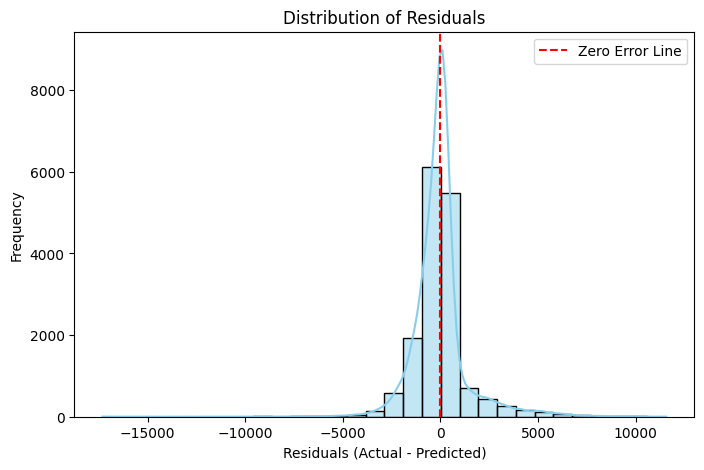

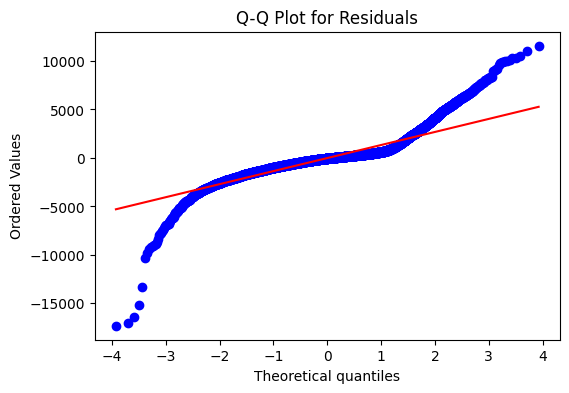

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats

diamonds = sns.load_dataset('diamonds')
data = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']].dropna()

X = data[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='Zero Error Line')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()


# Q2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

data = pd.DataFrame({
    'X1': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'X2': [9, 8, 7, 6, 5, 4, 3, 2, 1],
    'y': [10, 20, 30, 40, 50, 60, 70, 80, 90]
})

X = data[['X1', 'X2']]
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')


Mean Squared Error (MSE): 0.000
Mean Absolute Error (MAE): 0.000
Root Mean Squared Error (RMSE): 0.000


# Q3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity

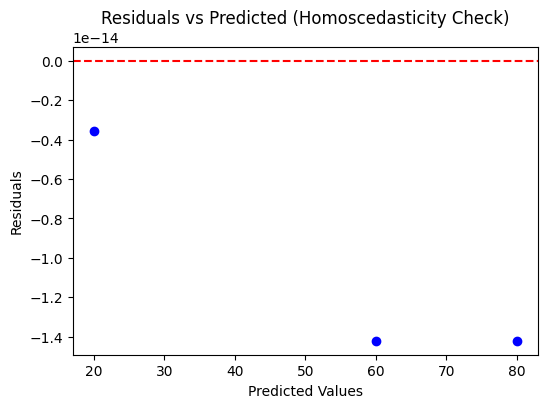

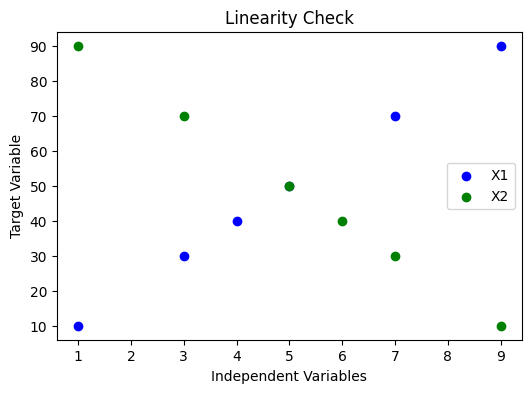

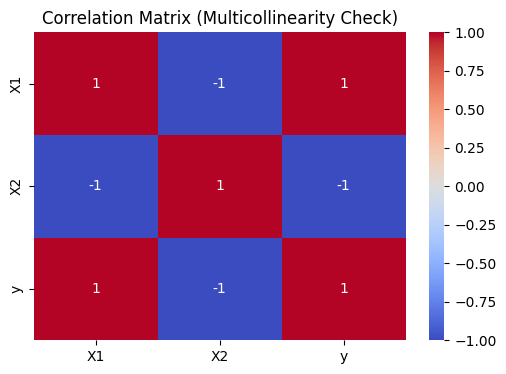

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.DataFrame({
    'X1': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'X2': [9, 8, 7, 6, 5, 4, 3, 2, 1],
    'y': [10, 20, 30, 40, 50, 60, 70, 80, 90]
})

X = data[['X1', 'X2']]
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted (Homoscedasticity Check)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(X_train['X1'], y_train, color='blue', label='X1')
plt.scatter(X_train['X2'], y_train, color='green', label='X2')
plt.title('Linearity Check')
plt.xlabel('Independent Variables')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

correlation_matrix = data.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Multicollinearity Check)')
plt.show()


# Q4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.DataFrame({
    'X1': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'X2': [9, 8, 7, 6, 5, 4, 3, 2, 1],
    'y': [10, 20, 30, 40, 50, 60, 70, 80, 90]
})

X = data[['X1', 'X2']]
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{name}:')
    print(f'  Mean Squared Error (MSE): {mse:.3f}')
    print(f'  R-squared (R²): {r2:.3f}\n')


Linear Regression:
  Mean Squared Error (MSE): 0.000
  R-squared (R²): 1.000

Ridge Regression:
  Mean Squared Error (MSE): 3.830
  R-squared (R²): 0.994

Lasso Regression:
  Mean Squared Error (MSE): 0.010
  R-squared (R²): 1.000

Random Forest:
  Mean Squared Error (MSE): 3.167
  R-squared (R²): 0.995



# Q5.  Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = pd.DataFrame({
    'X': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'y': [2, 4, 5, 4, 5, 6, 8, 9, 10]
})

X = data[['X']]
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Coefficient: {model.coef_[0]:.3f}')
print(f'Intercept: {model.intercept_:.3f}')
print(f'R-squared (R²) Score: {r2_score(y_test, y_pred):.3f}')


Coefficient: 0.971
Intercept: 0.971
R-squared (R²) Score: 0.851


# Q6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.

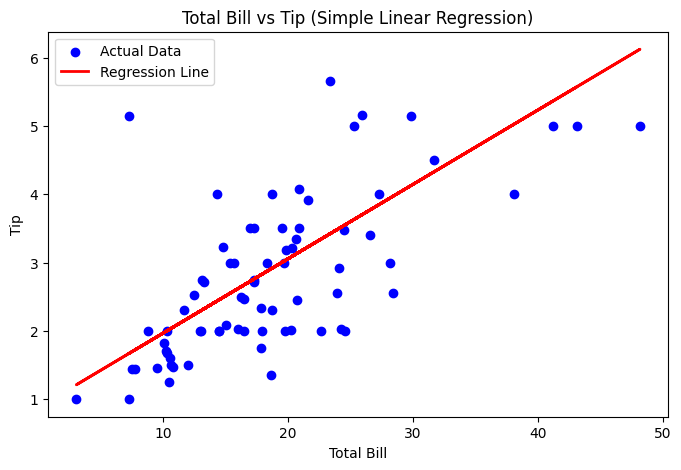

Coefficient: 0.109
Intercept: 0.877
R-squared (R²) Score: 0.429


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

data = sns.load_dataset('tips')

X = data[['total_bill']]
y = data['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Total Bill vs Tip (Simple Linear Regression)')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend()
plt.show()

print(f'Coefficient: {model.coef_[0]:.3f}')
print(f'Intercept: {model.intercept_:.3f}')
print(f'R-squared (R²) Score: {r2_score(y_test, y_pred):.3f}')


# Q7.  Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.

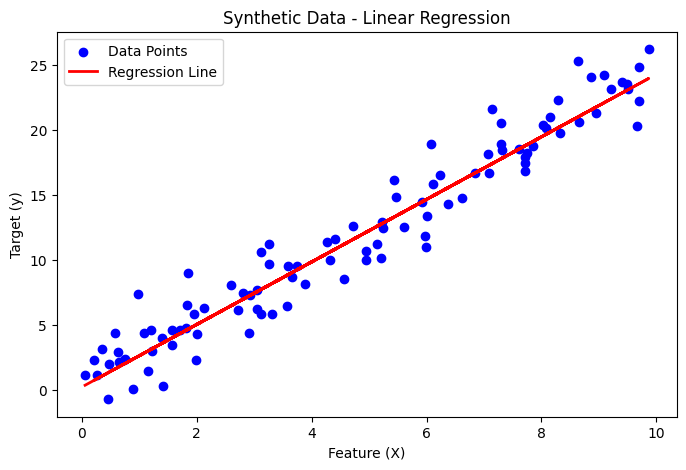

Coefficient: 2.407
Intercept: 0.236


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2.5 * X + np.random.randn(100, 1) * 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Synthetic Data - Linear Regression')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()

print(f'Coefficient: {model.coef_[0][0]:.3f}')
print(f'Intercept: {model.intercept_[0]:.3f}')


# Q8. Write a Python script that pickles a trained linear regression model and saves it to a file?

In [ ]:
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3.5 * X + np.random.randn(100, 1) * 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model has been pickled and saved as 'linear_regression_model.pkl'.")


Model has been pickled and saved as 'linear_regression_model.pkl'.


# Q9.  Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.

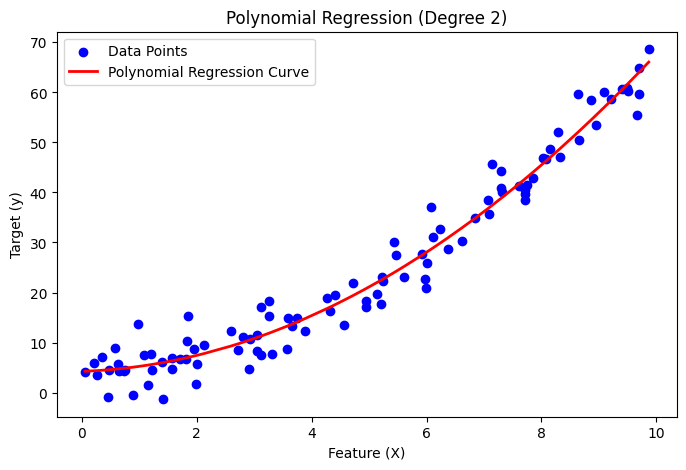

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 + 1.5 * X + 0.5 * X**2 + np.random.randn(100, 1) * 4

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)

X_sorted = np.sort(X, axis=0)
y_pred = poly_model.predict(X_sorted)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_sorted, y_pred, color='red', linewidth=2, label='Polynomial Regression Curve')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()


# Q10.  Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 4 + 3 * X + np.random.randn(100, 1) * 2

model = LinearRegression()
model.fit(X, y)

print(f'Coefficient: {model.coef_[0][0]:.3f}')
print(f'Intercept: {model.intercept_[0]:.3f}')


Coefficient: 2.908
Intercept: 4.430


# Q11.  Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.

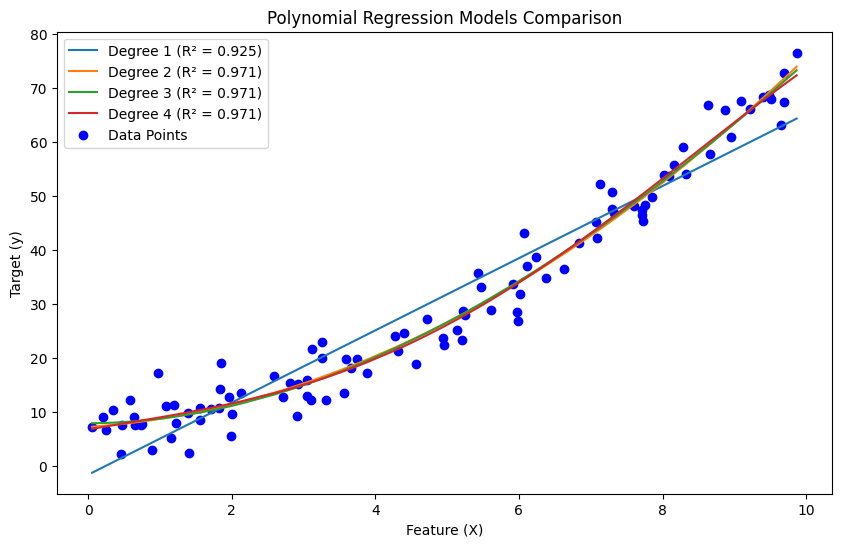

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 5 + 2 * X + 0.5 * X**2 + np.random.randn(100, 1) * 4

degrees = [1, 2, 3, 4]
plt.figure(figsize=(10, 6))

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)

    X_sorted = np.sort(X, axis=0)
    y_pred = model.predict(X_sorted)

    mse = mean_squared_error(y, model.predict(X))
    r2 = r2_score(y, model.predict(X))

    plt.plot(X_sorted, y_pred, label=f'Degree {degree} (R² = {r2:.3f})')

plt.scatter(X, y, color='blue', label='Data Points')
plt.title('Polynomial Regression Models Comparison')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()


# Q12. Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.

In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)
X = np.random.rand(100, 2) * 10
y = 3 + 2 * X[:, 0] + 1.5 * X[:, 1] + np.random.randn(100) * 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_:.3f}')
print(f'R-squared (R²) Score: {r2_score(y_test, y_pred):.3f}')


Coefficients: [2.03927416 1.66128267]
Intercept: 2.122
R-squared (R²) Score: 0.920


# Q13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.

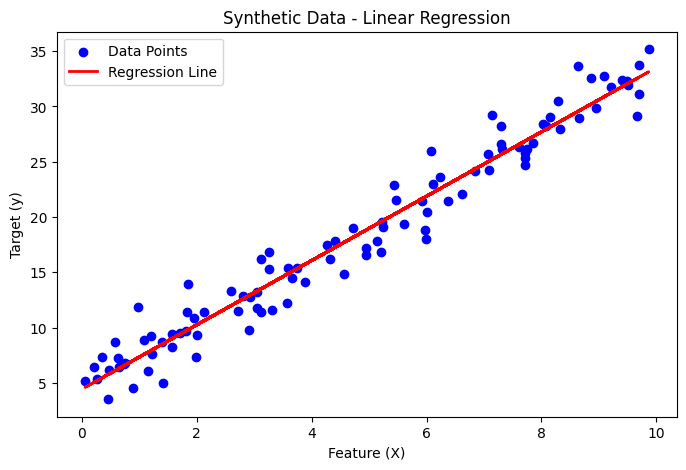

Coefficient: 2.908
Intercept: 4.430


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 4 + 3 * X + np.random.randn(100, 1) * 2

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Synthetic Data - Linear Regression')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()

print(f'Coefficient: {model.coef_[0][0]:.3f}')
print(f'Intercept: {model.intercept_[0]:.3f}')


# Q14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.

In [19]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataframe):
    """
    Calculate VIF for each feature in the dataframe
    Returns a dataframe with features and their VIF values
    """

    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i)
                      for i in range(dataframe.shape[1])]
    return vif_data

def main():

    np.random.seed(42)


    n_samples = 100

    # Feature 1: Random values
    x1 = np.random.normal(0, 1, n_samples)

    # Feature 2: Highly correlated with x1
    x2 = x1 * 2 + np.random.normal(0, 0.1, n_samples)

    # Feature 3: Moderately correlated with x1
    x3 = x1 * 0.5 + np.random.normal(0, 0.5, n_samples)

    # Feature 4: Mostly independent
    x4 = np.random.normal(0, 1, n_samples)


    df = pd.DataFrame({
        'Feature1': x1,
        'Feature2': x2,
        'Feature3': x3,
        'Feature4': x4
    })


    vif_results = calculate_vif(df)


    print("Variance Inflation Factors:")
    print(vif_results)


    print("\nInterpretation:")
    print("VIF < 5: No significant multicollinearity")
    print("5 ≤ VIF < 10: Moderate multicollinearity")
    print("VIF ≥ 10: High multicollinearity")


    for index, row in vif_results.iterrows():
        if row['VIF'] >= 10:
            print(f"WARNING: {row['Feature']} has high multicollinearity (VIF = {row['VIF']:.2f})")
        elif row['VIF'] >= 5:
            print(f"Note: {row['Feature']} has moderate multicollinearity (VIF = {row['VIF']:.2f})")

if __name__ == "__main__":
    main()

Variance Inflation Factors:
    Feature         VIF
0  Feature1  371.932809
1  Feature2  370.743588
2  Feature3    2.088325
3  Feature4    1.037599

Interpretation:
VIF < 5: No significant multicollinearity
5 ≤ VIF < 10: Moderate multicollinearity
VIF ≥ 10: High multicollinearity


# Q15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.

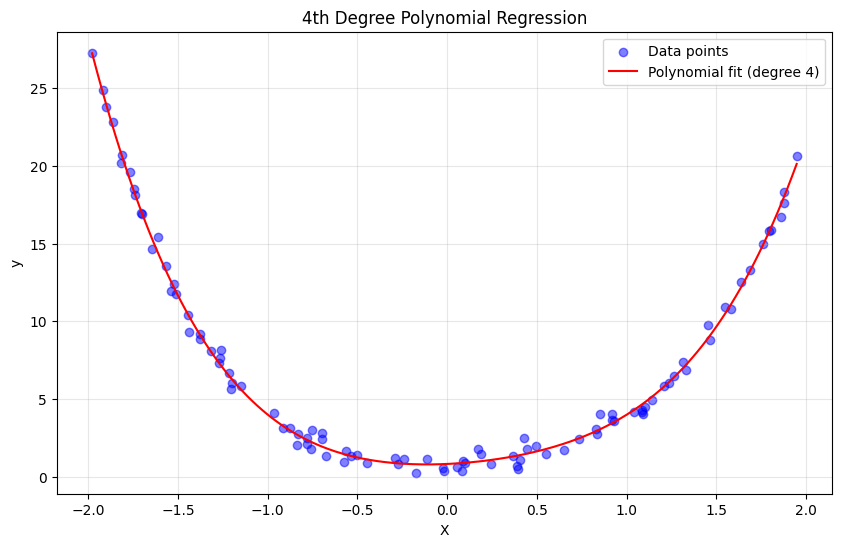

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def generate_synthetic_data(n_samples=100):
    np.random.seed(42)
    X = np.random.uniform(-2, 2, n_samples)
    true_coeffs = [1.0, -0.5, 2.0, 0.5, 1.0]
    y = (true_coeffs[0] * X**4 +
         true_coeffs[1] * X**3 +
         true_coeffs[2] * X**2 +
         true_coeffs[3] * X +
         true_coeffs[4] +
         np.random.normal(0, 0.5, n_samples))
    return X.reshape(-1, 1), y

def fit_polynomial_regression(X, y, degree=4):
    model = make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression()
    )
    model.fit(X, y)
    return model

def plot_regression(X, y, model):
    X_smooth = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    y_smooth = model.predict(X_smooth)
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
    plt.plot(X_smooth, y_smooth, color='red', label='Polynomial fit (degree 4)')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('4th Degree Polynomial Regression')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def main():
    X, y = generate_synthetic_data()
    model = fit_polynomial_regression(X, y)
    plot_regression(X, y, model)

if __name__ == "__main__":
    main()

# Q16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.

In [22]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

def generate_synthetic_data():
    X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)
    return X, y

def create_pipeline():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ])
    return pipeline

def main():
    X, y = generate_synthetic_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    pipeline = create_pipeline()
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    print(f"R-squared score: {r2:.4f}")

if __name__ == "__main__":
    main()

R-squared score: 1.0000


# Q17.  Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.

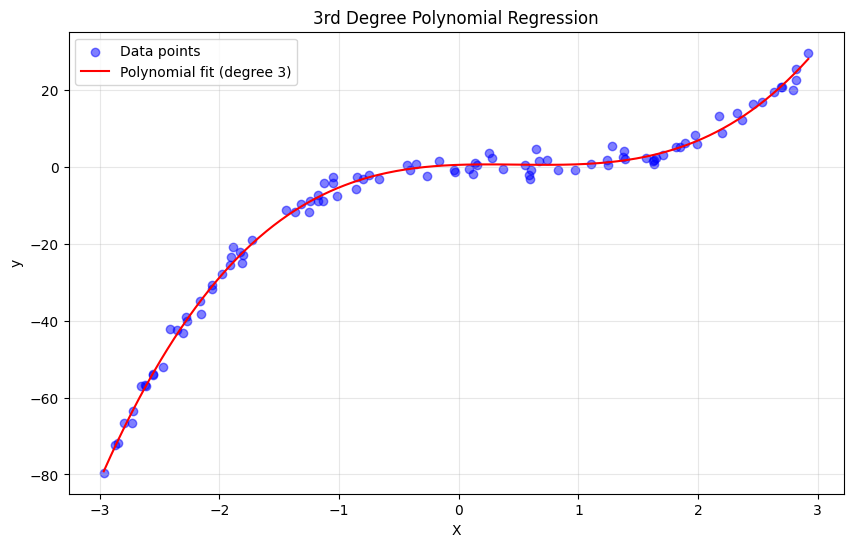

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def generate_synthetic_data(n_samples=100):
    np.random.seed(42)
    X = np.random.uniform(-3, 3, n_samples)
    y = 2 * X**3 - 3 * X**2 + X + 1 + np.random.normal(0, 2, n_samples)
    return X.reshape(-1, 1), y

def fit_polynomial_regression(X, y):
    model = make_pipeline(
        PolynomialFeatures(degree=3),
        LinearRegression()
    )
    model.fit(X, y)
    return model

def plot_regression(X, y, model):
    X_smooth = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    y_smooth = model.predict(X_smooth)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
    plt.plot(X_smooth, y_smooth, color='red', label='Polynomial fit (degree 3)')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('3rd Degree Polynomial Regression')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def main():
    X, y = generate_synthetic_data()
    model = fit_polynomial_regression(X, y)
    plot_regression(X, y, model)

if __name__ == "__main__":
    main()

# Q18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.

In [25]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)
X = np.random.rand(100, 5) * 10
y = 3 + 2 * X[:, 0] + 1.5 * X[:, 1] + 0.8 * X[:, 2] + 2.5 * X[:, 3] + 1.2 * X[:, 4] + np.random.randn(100) * 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'R-squared (R²) Score: {r2_score(y_test, y_pred):.3f}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_:.3f}')


R-squared (R²) Score: 0.889
Coefficients: [1.92821795 1.36888058 0.95910929 2.56750602 1.05356146]
Intercept: 3.780


# Q19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.

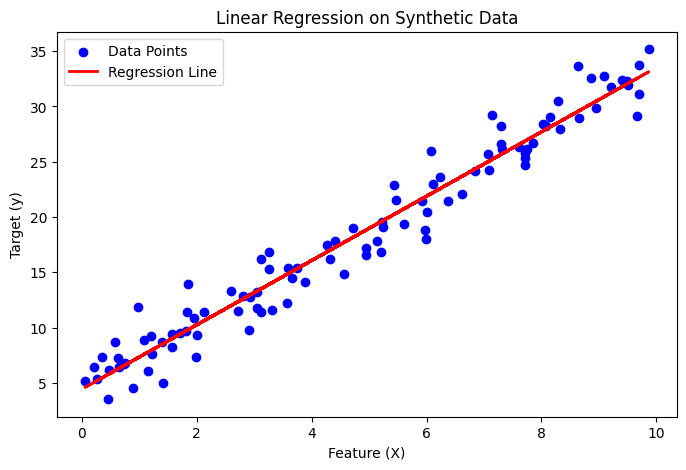

Coefficient: 2.908
Intercept: 4.430


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 4 + 3 * X + np.random.randn(100, 1) * 2

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()

print(f'Coefficient: {model.coef_[0][0]:.3f}')
print(f'Intercept: {model.intercept_[0]:.3f}')


# Q20.  Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)
X = np.random.rand(100, 3) * 10
y = 5 + 2 * X[:, 0] + 3 * X[:, 1] + 1.5 * X[:, 2] + np.random.randn(100) * 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'R-squared (R²) Score: {r2_score(y_test, y_pred):.3f}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_:.3f}')


R-squared (R²) Score: 0.959
Coefficients: [2.03411947 2.97309186 1.64219465]
Intercept: 4.841


# Q21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import joblib

def generate_data():
    X, y = make_regression(n_samples=1000, n_features=3, noise=0.1, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def save_model(model, filename='model.joblib'):
    joblib.dump(model, filename)
    print(f"Model saved to {filename}")

def load_model(filename='model.joblib'):
    loaded_model = joblib.load(filename)
    print(f"Model loaded from {filename}")
    return loaded_model

def evaluate_model(model, X_test, y_test):
    score = model.score(X_test, y_test)
    print(f"R-squared score: {score:.4f}")

def main():

    X_train, X_test, y_train, y_test = generate_data()


    original_model = train_model(X_train, y_train)


    print("Original model performance:")
    evaluate_model(original_model, X_test, y_test)


    save_model(original_model)


    loaded_model = load_model()


    print("Loaded model performance:")
    evaluate_model(loaded_model, X_test, y_test)


    original_preds = original_model.predict(X_test[:5])
    loaded_preds = loaded_model.predict(X_test[:5])
    print("\nFirst 5 predictions comparison:")
    print("Original model:", original_preds)
    print("Loaded model:", loaded_preds)

if __name__ == "__main__":
    main()

Original model performance:
R-squared score: 1.0000
Model saved to model.joblib
Model loaded from model.joblib
Loaded model performance:
R-squared score: 1.0000

First 5 predictions comparison:
Original model: [-76.43710119 111.40029066  49.20963214 179.2301135  -24.27352368]
Loaded model: [-76.43710119 111.40029066  49.20963214 179.2301135  -24.27352368]


# Q22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.

In [30]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

def load_and_prepare_data():
    tips = sns.load_dataset('tips')
    X = tips.drop('tip', axis=1)
    y = tips['tip']
    return X, y

def create_preprocessor(categorical_cols):
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
        ],
        remainder='passthrough'
    )
    return preprocessor

def create_pipeline(preprocessor):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])
    return pipeline

def main():
    X, y = load_and_prepare_data()
    categorical_cols = ['sex', 'smoker', 'day', 'time']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    preprocessor = create_preprocessor(categorical_cols)
    pipeline = create_pipeline(preprocessor)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"R-squared score: {r2:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    remainder_cols = [col for col in X.columns if col not in categorical_cols]
    all_feature_names = np.concatenate([feature_names, remainder_cols])
    coefficients = pipeline.named_steps['regressor'].coef_
    print("\nFeature Coefficients:")
    for name, coef in zip(all_feature_names, coefficients):
        print(f"{name}: {coef:.4f}")
    intercept = pipeline.named_steps['regressor'].intercept_
    print(f"\nIntercept: {intercept:.4f}")

if __name__ == "__main__":
    main()

R-squared score: 0.4373
Root Mean Squared Error: 0.8387

Feature Coefficients:
sex_Male: 0.0288
smoker_Yes: -0.1924
day_Sat: -0.1858
day_Sun: -0.0508
day_Thur: -0.1797
time_Lunch: 0.0950
total_bill: 0.0947
size: 0.2335

Intercept: 0.7274


# Q23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

In [32]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

def generate_data():
    X, y = make_regression(n_samples=1000, n_features=4, noise=10, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def train_linear_regression(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def train_ridge_regression(X_train, y_train, alpha=1.0):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2

def print_results(model, model_name, r2, feature_names):
    print(f"\n{model_name} Results:")
    print(f"R-squared score: {r2:.4f}")
    print("Coefficients:")
    for name, coef in zip(feature_names, model.coef_):
        print(f"{name}: {coef:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")

def main():
    X_train, X_test, y_train, y_test = generate_data()
    feature_names = [f"Feature_{i+1}" for i in range(X_train.shape[1])]

    linear_model = train_linear_regression(X_train, y_train)
    linear_r2 = evaluate_model(linear_model, X_test, y_test)

    ridge_model = train_ridge_regression(X_train, y_train)
    ridge_r2 = evaluate_model(ridge_model, X_test, y_test)

    print_results(linear_model, "Linear Regression", linear_r2, feature_names)
    print_results(ridge_model, "Ridge Regression", ridge_r2, feature_names)

if __name__ == "__main__":
    main()


Linear Regression Results:
R-squared score: 0.9915
Coefficients:
Feature_1: 51.6116
Feature_2: 8.4482
Feature_3: 97.2916
Feature_4: 48.3483
Intercept: -0.6907

Ridge Regression Results:
R-squared score: 0.9915
Coefficients:
Feature_1: 51.5529
Feature_2: 8.4368
Feature_3: 97.1745
Feature_4: 48.2777
Intercept: -0.6860


# Q24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.

In [33]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

def generate_data():
    X, y = make_regression(n_samples=1000, n_features=5, noise=15, random_state=42)
    return X, y

def perform_cross_validation(X, y, n_folds=5):
    model = LinearRegression()
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    return scores

def main():
    X, y = generate_data()
    cv_scores = perform_cross_validation(X, y)

    print(f"Cross-Validation Results ({len(cv_scores)}-fold):")
    print(f"Individual R² scores: {cv_scores}")
    print(f"Mean R² score: {np.mean(cv_scores):.4f}")
    print(f"Standard deviation: {np.std(cv_scores):.4f}")
    print(f"95% Confidence Interval: {np.mean(cv_scores) - 1.96 * np.std(cv_scores):.4f} to "
          f"{np.mean(cv_scores) + 1.96 * np.std(cv_scores):.4f}")

if __name__ == "__main__":
    main()

Cross-Validation Results (5-fold):
Individual R² scores: [0.93737232 0.94451228 0.9453228  0.94662937 0.94710768]
Mean R² score: 0.9442
Standard deviation: 0.0035
95% Confidence Interval: 0.9373 to 0.9511


# Q25.  Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

In [34]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

def generate_data():
    np.random.seed(42)
    X = np.random.uniform(-3, 3, 100).reshape(-1, 1)
    y = 2 * X**3 - X**2 + 0.5 * X + 1 + np.random.normal(0, 2, (100, 1))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train.ravel(), y_test.ravel()

def train_polynomial_model(X_train, y_train, degree):
    model = make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression()
    )
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)

def main():
    X_train, X_test, y_train, y_test = generate_data()
    degrees = [1, 2, 3, 4, 5]

    print("R-squared scores for different polynomial degrees:")
    for degree in degrees:
        model = train_polynomial_model(X_train, y_train, degree)
        r2 = evaluate_model(model, X_test, y_test)
        print(f"Degree {degree}: {r2:.4f}")

if __name__ == "__main__":
    main()

R-squared scores for different polynomial degrees:
Degree 1: 0.8495
Degree 2: 0.8797
Degree 3: 0.9949
Degree 4: 0.9945
Degree 5: 0.9945
